In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
%matplotlib inline

# load occupations

In [2]:
occ_names = []
with open('survey_occupations.txt', 'r+') as f:
    for l in f:
        l = l.replace('\n', '').lower()
        occ_names.append(l)
f.close()

# load data

In [3]:
edata = pd.read_csv('../../../data/education/employment_numbers.csv')
edata = edata.iloc[:-1, :]
edata.title = edata.title.apply(lambda x: str(x).lower())
edata.e2014 = edata.e2014.apply(lambda x: float(str(x).replace(',','')))
edata['area'] = edata.code.apply(lambda x: x[:2]).astype(float)
occs = edata[edata.code.apply(lambda x: x[-1:] != "0")]

In [4]:
data = occs[occs.title.isin(occ_names)].sort_values(by = 'e2014', ascending = False)

In [5]:
covered = data.area.unique()


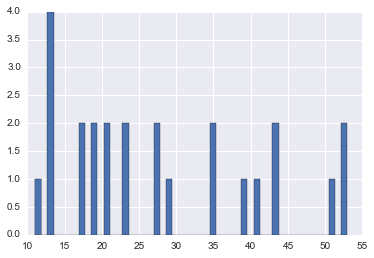

In [6]:
data.area.hist(bins = 50)

# Find excluded areas

In [7]:
groups = pd.read_csv('../../../data/helpers/occ_codes/major_groups.csv')
groups['group'] = groups.major_group.apply(lambda x: x[:2]).astype(float)
excluded = set(groups.group) - set(covered)

In [8]:
groups[~groups.group.isin(covered)]

,major_group,major_title,group
2,15-0000,Computer and Mathematical Occupations,15
7,25-0000,"Education, Training, and Library Occupations",25
10,31-0000,Healthcare Support Occupations,31
11,33-0000,Protective Service Occupations,33
13,37-0000,Building and Grounds Cleaning and Maintenance ...,37
17,45-0000,"Farming, Fishing, and Forestry Occupations",45
18,47-0000,Construction and Extraction Occupations,47
19,49-0000,"Installation, Maintenance, and Repair Occupations",49
22,55-0000,Military Specific Occupations,55


In [9]:
groups[groups.group.isin(covered)]

,major_group,major_title,group
0,11-0000,Management Occupations,11
1,13-0000,Business and Financial Operations Occupations,13
3,17-0000,Architecture and Engineering Occupations,17
4,19-0000,"Life, Physical, and Social Science Occupations",19
5,21-0000,Community and Social Service Occupations,21
6,23-0000,Legal Occupations,23
8,27-0000,"Arts, Design, Entertainment, Sports, and Media...",27
9,29-0000,Healthcare Practitioners and Technical Occupat...,29
12,35-0000,Food Preparation and Serving Related Occupations,35
14,39-0000,Personal Care and Service Occupations,39


In [10]:
consider = [25, 31, 45, 47]

# Find new potential occupations

In [11]:
for industry in excluded:
    current_involved = data[data.area == industry].title
    print current_involved
    subset = occs[occs.area == industry]
    display(subset.sort_values(by = 'e2014', ascending = False).head())

Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
519,33-9032,1095.4,security guards,NaN,33
512,33-3051,680.0,police and sheriff's patrol officers,NaN,33
507,33-3012,457.6,correctional officers and jailers,NaN,33
500,33-2011,327.3,firefighters,NaN,33
522,33-9092,141.3,"lifeguards, ski patrol, and other recreational...",NaN,33


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
556,37-2011,2360.6,"janitors and cleaners, except maids and housek...",NaN,37
557,37-2012,1457.7,maids and housekeeping cleaners,NaN,37
561,37-3011,1167.8,landscaping and groundskeeping workers,NaN,37
552,37-1011,247.9,first-line supervisors of housekeeping and jan...,NaN,37
553,37-1012,178.0,"first-line supervisors of landscaping, lawn se...",NaN,37


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
722,45-2092,470.2,"farmworkers and laborers, crop, nursery, and g...",NaN,45
723,45-2093,216.1,"farmworkers, farm, ranch, and aquacultural ani...",NaN,45
721,45-2091,57.8,agricultural equipment operators,NaN,45
719,45-2041,53.0,"graders and sorters, agricultural products",NaN,45
715,45-1011,47.1,"first-line supervisors of farming, fishing, an...",NaN,45


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
91,15-1132,718.4,"software developers, applications",NaN,15
99,15-1151,585.9,computer user support specialists,NaN,15
87,15-1121,567.8,computer systems analysts,NaN,15
92,15-1133,395.6,"software developers, systems software",NaN,15
96,15-1142,382.6,network and computer systems administrators,NaN,15


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
866,49-9071,1374.7,"maintenance and repair workers, general",NaN,49
832,49-3023,739.9,automotive service technicians and mechanics,NaN,49
812,49-1011,447.1,"first-line supervisors of mechanics, installer...",NaN,49
853,49-9041,332.2,industrial machinery mechanics,NaN,49
850,49-9021,292.0,"heating, air conditioning, and refrigeration m...",NaN,49


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
307,25-2021,1358.0,"elementary school teachers, except special edu...",NaN,25
334,25-9041,1234.1,teacher assistants,NaN,25
322,25-3099,982.5,"teachers and instructors, all other",NaN,25
311,25-2031,961.6,"secondary school teachers, except special and ...",NaN,25
308,25-2022,627.5,"middle school teachers, except special and car...",NaN,25


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
750,47-2061,1159.1,construction laborers,NaN,47
741,47-2031,945.4,carpenters,NaN,47
758,47-2111,628.8,electricians,NaN,47
735,47-1011,578.4,first-line supervisors of construction trades ...,NaN,47
768,47-2152,425.0,"plumbers, pipefitters, and steamfitters",NaN,47


Series([], Name: title, dtype: object)


,code,e2014,title,Unnamed: 3,area
472,31-1014,1492.1,nursing assistants,NaN,31
470,31-1011,913.5,home health aides,NaN,31
485,31-9092,591.3,medical assistants,NaN,31
484,31-9091,318.8,dental assistants,NaN,31
482,31-9011,168.8,massage therapists,NaN,31


In [12]:
41: cashiers, retail salespersons **
29: registered nurses
35: waiters & waitresses
35: chefs and head cooks, cooks, restaurant **
39: childcare workers, personal care aides **
23: lawyers
23: paralegals and legal assistants
53: industrial truck and tractor operators, heavy and tractor-trailer truck drivers **
53: taxi drivers and chauffers
11: general and operations managers **
11: chief executives
13: credit analysts, accoountants and auditors **
13: loan officers
13: insurance underwriters
13: tax examiners and collectors, and revenue agents
13: human resources specialists **
17: landscape architects, architects, except landscape and naval **
21: clergy
21: marriage and family therapists, child, family, and school social workers **
43: customer service representatives **
43: data entry keyers, secretaries and administrative assistants... **
43: meter readers, utilities
51: sewing machine operators
27: fashion designers
27: athletes and sports competitors
27: editors **
19: zoologists and wildlife biologists
19: physicists
    
25: elementary school teachers
31: home health aides
45: farmworkers and laborers
47: construction laborers
    
33: security guards
37: janitors and cleaners

SyntaxError: invalid syntax (<ipython-input-12-acf2259a3457>, line 1)

In [13]:
occs[occs.area == 19].sort_values(by = 'e2014', ascending = False)

,code,e2014,title,Unnamed: 3,area
190,19-3031,155.3,"clinical, counseling, and school psychologists",NaN,19
171,19-1042,107.9,"medical scientists, except epidemiologists",NaN,19
182,19-2041,94.6,"environmental scientists and specialists, incl...",NaN,19
179,19-2031,91.1,chemists,NaN,19
203,19-4021,79.3,biological technicians,NaN,19
212,19-4099,78.2,"life, physical, and social science technicians...",NaN,19
204,19-4031,66.5,chemical technicians,NaN,19
194,19-3051,38.0,urban and regional planners,NaN,19
165,19-1029,36.4,"biological scientists, all other",NaN,19
183,19-2042,36.4,"geoscientists, except hydrologists and geograp...",NaN,19


# Match occs to tasks

### match occs to code

In [14]:
code_titles = pd.read_csv('../../../data/databases/db15/Occupation Data.txt', delimiter = '\t')
code_titles.Title = code_titles.Title.apply(lambda x: str(x).lower())
codes = code_titles[code_titles.Title.isin(occ_names)]['O*NET-SOC Code']

In [15]:
all_tasks = pd.read_csv("../../../data/databases/db15/Task Statements.txt", delimiter = '\t')
tasks = all_tasks[all_tasks['O*NET-SOC Code'].isin(codes)]

In [16]:
for t in tasks.Task.unique():
    print t, '\n'

Direct or coordinate an organization's financial or budget activities to fund operations, maximize investments, or increase efficiency. 

Appoint department heads or managers and assign or delegate responsibilities to them. 

Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change. 

Direct, plan, or implement policies, objectives, or activities of organizations or businesses to ensure continuing operations, to maximize returns on investments, or to increase productivity. 

Prepare budgets for approval, including those for funding or implementation of programs. 

Confer with board members, organization officials, or staff members to discuss issues, coordinate activities, or resolve problems. 

Implement corrective action plans to solve organizational or departmental problems. 

Direct human resources activities, including the approval of human resource plans or ac

# TASKS

In [17]:
from random import shuffle

dwas = pd.read_csv('../../../data/databases/db15/DWA Reference.txt', delimiter = '\t')
index = list(dwas.index)
shuffle(index)
display(dwas.iloc[index].head())
display(dwas.head(10))


,Element ID,IWA ID,DWA ID,DWA Title
1744,4.A.4.b.3,4.A.4.b.3.I02,4.A.4.b.3.I02.D07,Teach online courses.
1456,4.A.3.b.6,4.A.3.b.6.I14,4.A.3.b.6.I14.D01,Prepare legal or investigatory documentation.
1882,4.A.4.b.4,4.A.4.b.4.I12,4.A.4.b.4.I12.D19,Coordinate activities of production personnel.
483,4.A.2.a.4,4.A.2.a.4.I06,4.A.2.a.4.I06.D04,Analyze medical data to determine cause of death.
1933,4.A.4.b.6,4.A.4.b.6.I02,4.A.4.b.6.I02.D01,Recommend types of assistive devices.


,Element ID,IWA ID,DWA ID,DWA Title
0,4.A.1.a.1,4.A.1.a.1.I01,4.A.1.a.1.I01.D01,Review art or design materials.
1,4.A.1.a.1,4.A.1.a.1.I01,4.A.1.a.1.I01.D02,Study details of musical compositions.
2,4.A.1.a.1,4.A.1.a.1.I01,4.A.1.a.1.I01.D03,Review production information to determine cos...
3,4.A.1.a.1,4.A.1.a.1.I01,4.A.1.a.1.I01.D04,Study scripts to determine project requirements.
4,4.A.1.a.1,4.A.1.a.1.I02,4.A.1.a.1.I02.D01,Read materials to determine needed actions.
5,4.A.1.a.1,4.A.1.a.1.I02,4.A.1.a.1.I02.D02,Read maps to determine routes.
6,4.A.1.a.1,4.A.1.a.1.I02,4.A.1.a.1.I02.D03,Review customer information.
7,4.A.1.a.1,4.A.1.a.1.I02,4.A.1.a.1.I02.D04,Read work orders or other instructions to dete...
8,4.A.1.a.1,4.A.1.a.1.I02,4.A.1.a.1.I02.D05,Read technical information needed to perform m...
9,4.A.1.a.1,4.A.1.a.1.I02,4.A.1.a.1.I02.D06,Study blueprints or other instructions to dete...


In [18]:
## merge with IWA & Element descriptions
iwas = pd.read_csv('../../../data/databases/db15/IWA Reference.txt', delimiter = '\t')
was = pd.read_csv('../../../data/databases/db15/Work Activities.txt', delimiter = '\t')

In [19]:
iwas_titles = iwas[['IWA ID', 'IWA Title']].drop_duplicates()
was_titles = was[['Element ID', 'Element Name']].drop_duplicates()
was_titles.columns = ['Element ID', 'WA Name']

In [20]:
total_work_activities = dwas.merge(iwas_titles, on = 'IWA ID', how = 'inner').merge(was_titles, on = 'Element ID', how = 'inner')
total_work_activities = total_work_activities[total_work_activities.columns[::-1]]
total_work_activities.to_csv('../../../data/helpers/work_activities.csv', index = False)

# SAMPLE DATA

In [25]:
def search(df, search_term, column):
    def clean(s):
        return s.strip().lower()
    return df[df[column].apply(lambda x: clean(search_term) in clean(x))]

In [ ]:
search(all_tasks)

In [26]:
all_tasks

,O*NET-SOC Code,Task ID,Task,Task Type,Incumbents Responding,Date,Domain Source
0,11-1011.00,8823,Direct or coordinate an organization's financi...,Core,87,07/2014,Incumbent
1,11-1011.00,8831,Appoint department heads or managers and assig...,Core,87,07/2014,Incumbent
2,11-1011.00,8825,Analyze operations to evaluate performance of ...,Core,87,07/2014,Incumbent
3,11-1011.00,8826,"Direct, plan, or implement policies, objective...",Core,87,07/2014,Incumbent
4,11-1011.00,8827,"Prepare budgets for approval, including those ...",Core,87,07/2014,Incumbent
5,11-1011.00,8824,"Confer with board members, organization offici...",Core,87,07/2014,Incumbent
6,11-1011.00,8836,Implement corrective action plans to solve org...,Core,87,07/2014,Incumbent
7,11-1011.00,8832,"Direct human resources activities, including t...",Core,86,07/2014,Incumbent
8,11-1011.00,8835,Establish departmental responsibilities and co...,Core,86,07/2014,Incumbent
9,11-1011.00,8833,"Preside over or serve on boards of directors, ...",Core,87,07/2014,Incumbent
